## COGS 108 - Final Project

## Introduction and Background

Bitcoin is the world's first online, decentralized, peer to peer currency. Its creator intended for it to be used instead of fiat controlled by the governments and banks. Although the mainstream news outlets have began reporting on it because of the recent price jumps. General usage of Bitcoin users have not been studied extensively.

Cryptocurrency is very young, it was only introduced in 2008. It is a concept that continues to remain a mystery for most people, and yet the concept surrounding it is steadily gaining popularity and increasing interest, especially among major financial institutions such as banks, governments, and large tech companies. In fact, nearly all major financial firms and prominent software companies have by now performed substantial research on various types of cryptocurrency. This suggests a question of whether cryptocurrency will soon become the foundation of the world’s economy, or in the very least be a widely used form of currency among people in the near future.

According to Forbes, a cryptocurrency such as Bitcoin will gradually rise in popularity and will become a widespread form of commonly used currency because of its reliability, in that it can’t be bounced or charged back, and works 24/7, 365 days a year. It is easily accessible during emergencies, such as earthquakes and hurricanes, while a bank could be shut down. This information would suggest that users would be increasing their activity using Bitcoin, and therefore lead to the logical hypothesis that older users are steadily becoming more active users of the Bitcoin platform.

## Part 0: Setup

In [65]:
# Imports
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt

## Part 1: Data Cleaning

## 1a) Condense dat files: block hash, transaction overview
Drop irrelevant columns in bh.dat and tx.dat; store result dataframes to bh.dat and tx.dat.

Result:

bh.dat: 

| Block ID | Block Timestamp |

tx.dat: 

|Transaction ID | Block ID |

In [ ]:
# file path for data
bh_filepath = 'data/bh.dat'
tx_filepath = 'data/tx.dat'

# read data
df_block_hash = pd.read_csv(bh_filepath, sep = '\t')
df_transaction = pd.read_csv(tx_filepath, sep = '\t')

# set column names
df_block_hash.columns = ['block ID', 'hash', 'timestamp', 'number of transactions']
df_transaction.columns = ['transaction ID', 'block ID', 'input count', 'output count']

# drop irrelevant columns
df_block_hash.drop(['hash', 'number of transactions'], axis = 1, inplace = True)
df_transaction.drop(['input count', 'output count'], axis = 1, inplace = True)

# check head after drop
print(df_block_hash.head())
print(df_transaction.head())

# write block hash dataframe to a new dat file
bh_drop_filepath = 'data/bh.dat'
df_block_hash.to_csv(path_or_buf = bh_drop_filepath, sep = '\t', index = False, columns = ['block ID', 'timestamp'])

tx_drop_filepath = 'data/tx.dat'
df_transaction.to_csv(path_or_buf = tx_drop_filepath, sep = '\t', index = False, 
                      columns = ['transaction ID', 'block ID'])

## 1b) Condense dat files: transaction input
Split txin.dat to small dat files; drop irrelevant columns; store result dataframes to txin_1.dat to txin_11.dat.

Result:

txin_1.dat - txin_11.dat: 

| Transaction ID | Address ID |

In [ ]:
# split transaction_input file
!split -l 70000000 data/txin.dat t

# set filepath
num_txin_file = 11

txin_input_filepath = ['txin/taa', 'txin/tab', 'txin/tac', 'txin/tad', 'txin/tae', 'txin/taf', 'txin/tag', 'txin/tah',
                      'txin/tai', 'txin/taj', 'txin/tak']
txin_output_filepath = ['txin/txin_1.dat', 'txin/txin_2.dat', 'txin/txin_3.dat', 'txin/txin_4.dat', 'txin/txin_5.dat', 
                        'txin/txin_6.dat', 'txin/txin_7.dat', 'txin/txin_8.dat', 'txin/txin_9.dat', 'txin/txin_10.dat', 
                        'txin/txin_11.dat']

# for loop to drop irrelevant columns in transaction_input
for x in range(num_txin_file):
    curr_input_filepath = txin_input_filepath[x]
    curr_output_filepath = txin_output_filepath[x]
    
    df_txin = pd.read_csv(curr_input_filepath, sep = '\t')
    
    df_txin.columns = ['transaction ID', 'input sequence', 'previous transaction ID', 'previous output sequence', 
                       'address ID', 'sum']
    
    df_txin.drop(['input sequence', 'previous transaction ID', 'previous output sequence', 'sum'], 
                 axis = 1, inplace = True)
    
    df_txin.to_csv(path_or_buf = curr_output_filepath, sep = '\t', index = False, 
                   columns = ['transaction ID', 'address ID'])

## 1c) Condense dat files: transaction output
Split txout.dat to small dat files; drop irrelevant columns; store result dataframes to txout_1.dat to txout_12.dat.

Result:

txout_1.dat - txout_12.dat: 

| Transaction ID | Address ID |

In [ ]:
# split transaction_output file
!split -l 70000000 data/txout.dat m

# set filepath
num_txout_file = 12

txout_input_filepath = ['txout/maa', 'txout/mab', 'txout/mac', 'txout/mad', 'txout/mae', 'txout/maf', 'txout/mag', 
                        'txout/mah', 'txout/mai', 'txout/maj', 'txout/mak', 'txout/mal']
txout_output_filepath = ['txout/txout_1.dat', 'txout/txout_2.dat', 'txout/txout_3.dat', 'txout/txout_4.dat', 
                         'txout/txout_5.dat', 'txout/txout_6.dat', 'txout/txout_7.dat', 'txout/txout_8.dat', 
                         'txout/txout_9.dat', 'txout/txout_10.dat', 'txout/txout_11.dat', 'txout/txout_12.dat']

# for loop to drop irrelevant columns in transaction_output
for x in range(num_txout_file):
    curr_input_filepath = txout_input_filepath[x]
    curr_output_filepath = txout_output_filepath[x]
    
    df_txout = pd.read_csv(curr_input_filepath, sep = '\t')
    
    df_txout.columns = ['transaction ID', 'output sequence', 'address ID', 'sum']
    
    df_txout.drop(['output sequence', 'sum'], axis = 1, inplace = True)
    
    df_txout.to_csv(path_or_buf = curr_output_filepath, sep = '\t', index = False, 
                   columns = ['transaction ID', 'address ID'])

## 1d) Convert UNIX time to standard time
Implement a function that converts UNIX to standard time; add a column "year" in bh.dat.

Before: 

| Block ID | Block Timestamp |

After: 

| Block ID | Block Timestamp | Month | Year |

In [ ]:
from datetime import datetime
file='bh_simplified.dat'

df=pd.read_csv(file, sep='\t')

def getYear(data):
    d=datetime.fromtimestamp(data)
    return d.timetuple().tm_year
def getMonth(data):
    d=datetime.fromtimestamp(data)
    return d.timetuple().tm_mon

df['month']=df['timestamp'].apply(getMonth)
df['year']=df['timestamp'].apply(getYear)

df.to_csv('bh_readable.dat', sep='\t', index=False)

## 1e) Range of Block IDs for each year

In [ ]:
bh_filepath = 'data/bh_readable.dat'
df_block_hash = pd.read_csv(bh_filepath, sep = '\t')
df_block_hash.columns = ['blockID', 'timestamp', 'month', 'year']
df_block_hash.head()

range_block_each_year = {}

target_year = df_block_hash["year"][0]

target_block_start = 1
target_block_end = 1

for row in df_block_hash.itertuples():
    curr_year = row.year
    
    if curr_year > target_year:
        curr_block_id = row.blockID
        
        target_block_end = curr_block_id - 1
        
        range_block_each_year[target_year] = (target_block_start, target_block_end)
        
        target_block_start = curr_block_id
        
        target_year += 1
        
    if target_year == 2018:
        break
        
print(range_block_each_year)

## 1f) Range of Transaction IDs for each year

In [ ]:
tx_filepath = 'data/tx.dat'
df_tx = pd.read_csv(tx_filepath, sep = '\t')
df_tx.columns = ['transactionID', 'blockID']

range_tx_each_year = {}

for key in range_block_each_year:
    value = range_block_each_year[key]
    
    block_range_start = value[0]
    block_range_end = value[1]
    
    df_curr = df_tx[df_tx['blockID'] == block_range_start]
    df_curr.reset_index()
    tx_range_start = df_curr.iloc[0]['transactionID']
    
    df_curr = df_tx[df_tx['blockID'] == block_range_end]
    df_curr.reset_index()
    tx_range_end = df_curr.iloc[len(df_curr) - 1]['transactionID']
    
    range_tx_each_year[key] = (tx_range_start, tx_range_end)
    
print(range_tx_each_year)

## 1g) Re-split tx_in dat files into one-year time period

Used UNIX Commands to re-split up into 1-year chunks.

## Part 2: Create Dataframe for Samples from 2011
1. We first had to find the range of new address ids from the year 2011.
2. Once we had our range, we need to collect our sample users which we were going to study.
3. With our sample in hand, we counted the amount of transactions per year address id.

## 2a) Sample Address IDs created in 2011

In [2]:
df_samples = pd.DataFrame(columns = ['address ID'])

In [3]:
data10 = pd.read_csv('TxinFiles/txin_2010.dat', sep='\t')

In [4]:
# get the largest address ID that is created in 2010
max_addr_ID = data10['address ID'].max()

In [5]:
data11 = pd.read_csv('TxinFiles/txin_2011.dat', sep='\t')

In [6]:
# get the range of address ID that is created in 2011
min_addr_ID = max_addr_ID + 1
max_addr_ID = data11['address ID'].max()

In [8]:
num_sample = 50
lower_bound = 100
count = 0

while count < 50:
    rand_sample_ID = rd.randint(min_addr_ID, max_addr_ID)
    
    df_ID_exclusive = data11[data11['address ID'] == rand_sample_ID]
    
    num_tx_2011 = len(df_ID_exclusive)
    
    if(num_tx_2011 >= lower_bound):
        df_samples.loc[count, 'address ID'] = rand_sample_ID
        
        count += 1

## 2b) Aggregate Number of Transactions Each Year

In [9]:
df_samples['tx2011'] = 0

for x in range(len(df_samples)):
    curr_addr_ID = df_samples.loc[x]['address ID']
    
    df_ID_exclusive = data11[data11['address ID'] == curr_addr_ID]
    
    df_samples.loc[x, 'tx2011'] = len(df_ID_exclusive)

In [11]:
data12 = pd.read_csv('TxinFiles/txin_2012.dat', sep='\t')

In [12]:
df_samples['tx2012'] = 0

for x in range(len(df_samples)):
    curr_addr_ID = df_samples.loc[x]['address ID']
    
    df_ID_exclusive = data12[data12['address ID'] == curr_addr_ID]
    
    df_samples.loc[x, 'tx2012'] = len(df_ID_exclusive)

In [14]:
data13 = pd.read_csv('TxinFiles/txin_2013.dat', sep='\t')

In [15]:
df_samples['tx2013'] = 0

for x in range(len(df_samples)):
    curr_addr_ID = df_samples.loc[x]['address ID']
    
    df_ID_exclusive = data13[data13['address ID'] == curr_addr_ID]
    
    df_samples.loc[x, 'tx2013'] = len(df_ID_exclusive)

In [17]:
data14 = pd.read_csv('TxinFiles/txin_2014.dat', sep='\t')

In [18]:
df_samples['tx2014'] = 0

for x in range(len(df_samples)):
    curr_addr_ID = df_samples.loc[x]['address ID']
    
    df_ID_exclusive = data14[data14['address ID'] == curr_addr_ID]
    
    df_samples.loc[x, 'tx2014'] = len(df_ID_exclusive)

In [19]:
data15 = pd.read_csv('TxinFiles/txin_2015.dat', sep='\t')

In [20]:
df_samples['tx2015'] = 0

for x in range(len(df_samples)):
    curr_addr_ID = df_samples.loc[x]['address ID']
    
    df_ID_exclusive = data15[data15['address ID'] == curr_addr_ID]
    
    df_samples.loc[x, 'tx2015'] = len(df_ID_exclusive)

In [21]:
data16 = pd.read_csv('TxinFiles/txin_2016.dat', sep='\t')

/Users/hairy/anaconda2/envs/n/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [22]:
df_samples['tx2016'] = 0

for x in range(len(df_samples)):
    curr_addr_ID = df_samples.loc[x]['address ID']
    
    df_ID_exclusive = data16[data16['address ID'] == curr_addr_ID]
    
    df_samples.loc[x, 'tx2016'] = len(df_ID_exclusive)

In [23]:
data17 = pd.read_csv('TxinFiles/txin_2017.dat', sep='\t')

In [24]:
df_samples['tx2017'] = 0

for x in range(len(df_samples)):
    curr_addr_ID = df_samples.loc[x]['address ID']
    
    df_ID_exclusive = data17[data17['address ID'] == curr_addr_ID]
    
    df_samples.loc[x, 'tx2017'] = len(df_ID_exclusive)

In [27]:
df_samples.head()

,address ID,tx2011,tx2012,tx2013,tx2014,tx2015,tx2016,tx2017
0,1084197.0,137,25,0,0,0,0,0
1,922761.0,103,1,7,0,0,0,0
2,525152.0,108,73,10,0,0,0,0
3,827446.0,136,15,0,0,0,0,0
4,828949.0,130,0,0,0,0,0,0


## Part 3: Data Visualization of Samples from 2011
* We visualized the data in several ways in order to identify the activity of the address ids over time.

## 3a) Sum

In [61]:
years = np.array(['2011', '2012', '2013', '2014', '2015', '2016', '2017'])
sum_tx = np.array([0] * 7)

In [62]:
for x in range(len(years)):
    sum_tx[x] = df_samples[ "tx" + years[x]].sum()

In [82]:
years_num = [2011, 2012, 2013, 2014, 2015, 2016, 2017]

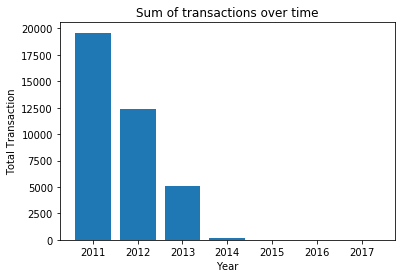

In [78]:
# plot bar chart
plt.bar(years_num, sum_tx)
plt.xlabel('Year')
plt.ylabel('Total Transaction')
plt.title('Sum of transactions over time')
plt.show()

## 3b) Mean

In [79]:
mean_tx = np.array([0] * 7)

In [81]:
for x in range(len(years)):
    mean_tx[x] = df_samples[ "tx" + years[x]].mean()

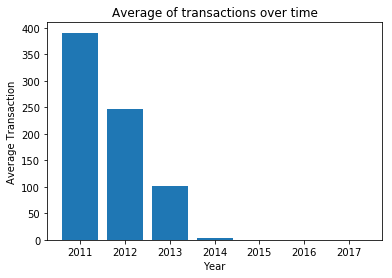

In [83]:
# plot bar chart
plt.bar(years_num, mean_tx)
plt.xlabel('Year')
plt.ylabel('Average Transaction')
plt.title('Average of transactions over time')
plt.show()

Year-to-year ratios:

In [154]:
print(mean_tx[1]/mean_tx[0])
print(mean_tx[2]/mean_tx[1])
print(mean_tx[3]/mean_tx[2])

0.6317135549872123
0.4089068825910931
0.039603960396039604


## 3c) Median

In [84]:
median_tx = np.array([0] * 7)

In [85]:
for x in range(len(years)):
    median_tx[x] = df_samples[ "tx" + years[x]].median()

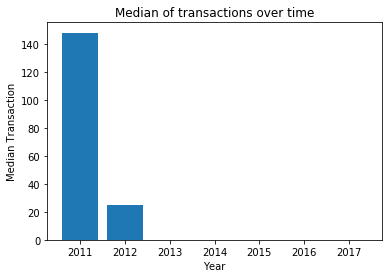

In [86]:
# plot bar chart
plt.bar(years_num, median_tx)
plt.xlabel('Year')
plt.ylabel('Median Transaction')
plt.title('Median of transactions over time')
plt.show()

## Part 4: Data Analysis on Samples from 2011

* From our sum and mean graphs we can see that average and total activity of our sample addresses decreases dramatically over time. The first two years activity gets cut in half each year. 
* The graph of the median reinforces this drop-off. With the middle user becoming inactive after two years.
* Simple observations of the values in our sample also show us that addresses with higher initial transactions their first year are more likely to maintain activity in the subsequent years.

## Part 5: Create Dataframe for Samples from 2014

## 5a) Sample Address IDs created in 2014

In [87]:
df_samples_2014 = pd.DataFrame(columns = ['address ID'])

In [88]:
# get the largest address ID that is created in 2013
max_addr_ID = data13['address ID'].max()

In [89]:
# get the range of address ID that is created in 2014
min_addr_ID = max_addr_ID + 1
max_addr_ID = data14['address ID'].max()

In [90]:
num_sample = 50
lower_bound = 100
count = 0

while count < 50:
    rand_sample_ID = rd.randint(min_addr_ID, max_addr_ID)
    
    df_ID_exclusive = data14[data14['address ID'] == rand_sample_ID]
    
    num_tx_2014 = len(df_ID_exclusive)
    
    if(num_tx_2014 >= lower_bound):
        df_samples_2014.loc[count, 'address ID'] = rand_sample_ID
        
        count += 1

In [97]:
df_samples_2014['address ID'] = df_samples_2014['address ID'].apply(int)

## 5b) Aggregate Number of Transactions Each Year

In [99]:
df_samples_2014['tx2014'] = 0

for x in range(len(df_samples_2014)):
    curr_addr_ID = df_samples_2014.loc[x]['address ID']
    
    df_ID_exclusive = data14[data14['address ID'] == curr_addr_ID]
    
    df_samples_2014.loc[x, 'tx2014'] = len(df_ID_exclusive)

In [100]:
df_samples_2014['tx2015'] = 0

for x in range(len(df_samples_2014)):
    curr_addr_ID = df_samples_2014.loc[x]['address ID']
    
    df_ID_exclusive = data15[data15['address ID'] == curr_addr_ID]
    
    df_samples_2014.loc[x, 'tx2015'] = len(df_ID_exclusive)

In [101]:
df_samples_2014['tx2016'] = 0

for x in range(len(df_samples_2014)):
    curr_addr_ID = df_samples_2014.loc[x]['address ID']
    
    df_ID_exclusive = data16[data16['address ID'] == curr_addr_ID]
    
    df_samples_2014.loc[x, 'tx2016'] = len(df_ID_exclusive)

In [102]:
df_samples_2014['tx2017'] = 0

for x in range(len(df_samples_2014)):
    curr_addr_ID = df_samples_2014.loc[x]['address ID']
    
    df_ID_exclusive = data17[data17['address ID'] == curr_addr_ID]
    
    df_samples_2014.loc[x, 'tx2017'] = len(df_ID_exclusive)

In [103]:
df_samples_2014.head()

,address ID,tx2014,tx2015,tx2016,tx2017
0,55748240,168,389,0,0
1,37744477,124,0,0,0
2,36744451,232,0,0,18
3,57199041,234,0,0,3
4,32060213,118,152,0,5


## Part 6: Data Visualization of Sample from 2014

## 6a) Sum

In [104]:
years = np.array(['2014', '2015', '2016', '2017'])
sum_tx_2014 = np.array([0] * 4)

In [105]:
for x in range(len(years)):
    sum_tx_2014[x] = df_samples_2014[ "tx" + years[x]].sum()

In [106]:
years_num = [2014, 2015, 2016, 2017]

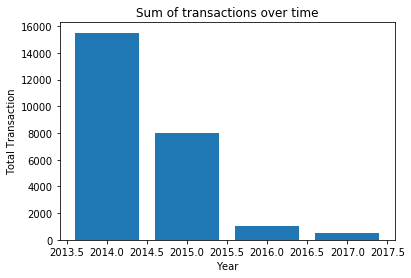

In [107]:
# plot bar chart
plt.bar(years_num, sum_tx_2014)
plt.xlabel('Year')
plt.ylabel('Total Transaction')
plt.title('Sum of transactions over time')
plt.show()

## 6b) Mean

In [108]:
mean_tx_2014 = np.array([0] * 4)

In [109]:
for x in range(len(years)):
    mean_tx_2014[x] = df_samples_2014[ "tx" + years[x]].mean()

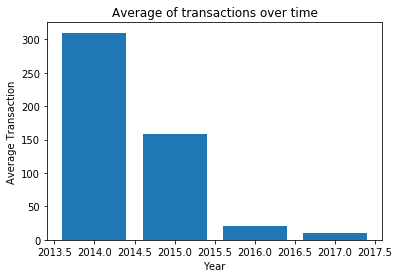

In [110]:
# plot bar chart
plt.bar(years_num, mean_tx_2014)
plt.xlabel('Year')
plt.ylabel('Average Transaction')
plt.title('Average of transactions over time')
plt.show()

Year-to-year ratios:

In [151]:
print(mean_tx_2014[1]/mean_tx_2014[0])
print(mean_tx_2014[2]/mean_tx_2014[1])
print(mean_tx_2014[3]/mean_tx_2014[2])

0.5129032258064516
0.1320754716981132
0.47619047619047616


## 6c) Median

In [111]:
median_tx_2014 = np.array([0] * 4)

In [112]:
for x in range(len(years)):
    median_tx_2014[x] = df_samples_2014[ "tx" + years[x]].median()

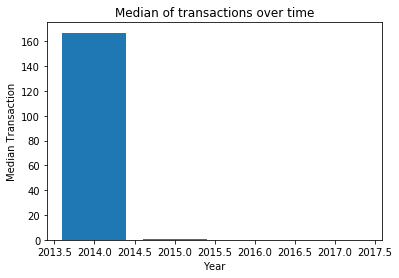

In [113]:
# plot bar chart
plt.bar(years_num, median_tx_2014)
plt.xlabel('Year')
plt.ylabel('Median Transaction')
plt.title('Median of transactions over time')
plt.show()

## Part 7: Data Analysis on Samples from 2014

* As we can see in our mean year-to-year ratios, there is a halving from 2014 to 2015. After that there is a steeper drop off from 2015 to 2016. And then another halving from 2016 to 2017.
* The median graph shows that after one year the median has virtually no transactions.

## Part 8: Data Analysis on our sample groups

* When we compare both samples we notice a harder drop off in activity with the 2014 group. This shows up in the median graphs where the 2011 sample maintains some usage, whereas the 2014 group has essentially no activity.
* The year-to-year ratios also support the above point. The 2011 group's mean gets cut in half twice before facing a steeper drop. The 2014 group only gets cut in half once before falling off.

## Part 9: Privacy/Ethics Consideration

In accordance with the Safe Harbor Method, we removed all account numbers from our data set and replaced them with an incrementing account number based on the order of appearance. Our data set does contain dates, but we do not consider this as an identifier because our unit of analysis is on the timescale of years. Which is too broad to be useful with the identification of Bitcoin users. 

## Part 10: Discussion & Conclusion

## Part 11: Each Member 's Contributions

   As discussed earlier we have multiple revisions of our code base and sampling techniques. Emma, Lucas and Allen all worked equally on the codebase leading up to the last one. Allen did the final revision/rebuild of our code, while Emma and Lucas worked on the write up.

## References

References (include links):

1) https://senseable2015-6.mit.edu/bitcoin/  

2) http://www.vo.elte.hu/bitcoin/  

3) https://blockgeeks.com/guides/what-is-cryptocurrency/  

4) https://www.forbes.com/sites/investor/2019/02/15/bitcoin-really-is-money-heres-why/#6d569bc479d2